In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, r2_score, roc_auc_score, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.datasets import make_circles
plt.style.use("ggplot")

# Clasificacion

In [47]:
X, y = make_circles(1000, noise=0.3, factor=0.1)

Text(0, 0.5, '$x_2$')

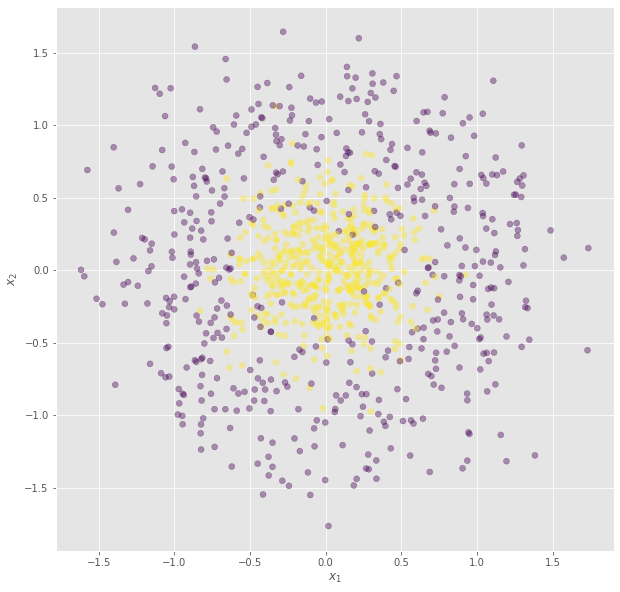

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

In [49]:
print(X.shape)

(1000, 2)


In [50]:
print(y.shape)

(1000,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

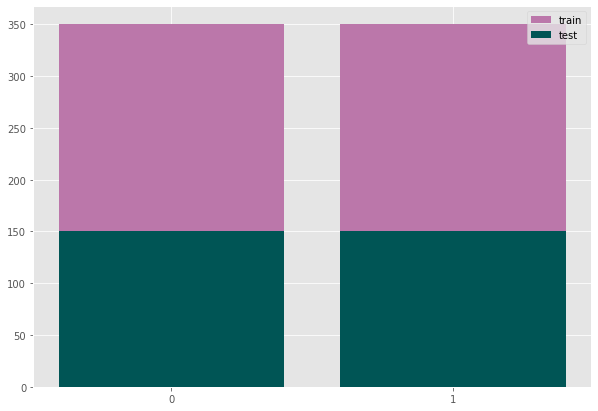

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(*np.unique(y_train, return_counts=True), color="#BB77AA", label="train")
ax.bar(*np.unique(y_test, return_counts=True), color="#005555", label="test")
ax.set_xticks([0, 1])
ax.legend()

In [53]:
clf = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
clf.score(X_test, y_test)

0.9

In [55]:
y_pred = clf.predict(X_test)

In [61]:
f1_score(y_test, y_pred, average="macro")

0.8999822190611664

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.89      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [68]:
y_pred2 = clf.predict_proba(X_test)[:, 1]

In [76]:
y_pred2

array([6.65842088e-02, 9.03037804e-01, 1.25093274e-01, 1.25955065e-01,
       9.16364831e-01, 1.62060459e-01, 9.44258734e-01, 2.76615834e-03,
       9.19238594e-01, 7.76972575e-01, 5.43566887e-02, 9.83413688e-01,
       9.58659321e-01, 3.13854794e-02, 7.72302839e-01, 9.69861017e-01,
       9.57701765e-01, 8.62547804e-01, 9.68737072e-01, 9.23326594e-01,
       9.11316262e-01, 3.33249096e-01, 3.71776889e-02, 2.81489716e-04,
       8.27621832e-03, 6.25413047e-01, 8.80108673e-01, 8.04946068e-01,
       3.57290385e-01, 8.86889650e-01, 6.73868184e-01, 9.43168975e-01,
       1.01139474e-01, 9.35821956e-01, 4.25348591e-01, 1.57095795e-01,
       9.50723968e-01, 8.04675169e-01, 1.93690270e-02, 5.90994870e-03,
       6.53806710e-01, 8.13914083e-01, 5.52372524e-01, 1.13339677e-02,
       9.72608954e-01, 2.01238915e-02, 9.34983133e-01, 9.46645921e-01,
       3.13332093e-03, 8.20942029e-02, 8.95082246e-01, 6.04876482e-01,
       8.35520357e-01, 9.79873923e-01, 1.35747141e-02, 9.38995481e-03,
      

In [70]:
roc_auc_score(y_test, y_pred2)

0.9713333333333334

In [73]:
x, y, _, = roc_curve(y_test, y_pred2)

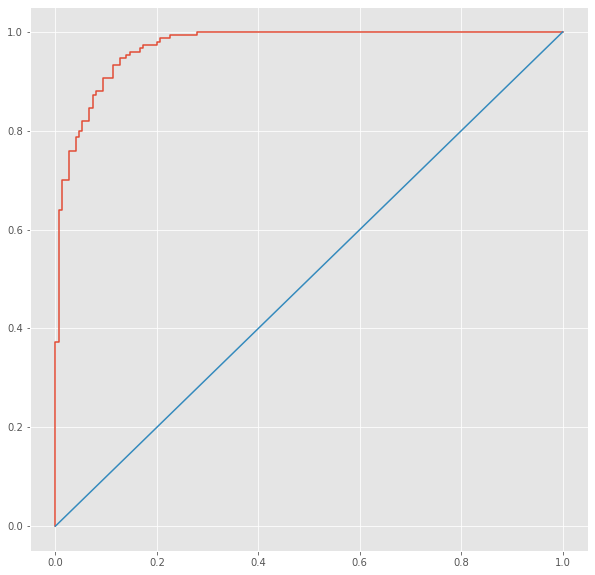

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x, y)
ax.plot([0, 1], [0, 1])

In [87]:
MLPClassifier?

In [96]:
hgrid = {
    "hidden_layer_sizes": [(16, ), (32, ), (64, ), (128, ), (256,), (512,)],
    "activation": ["logistic", "relu"]
}

In [97]:
gs = GridSearchCV(MLPClassifier(), hgrid, scoring=make_scorer(f1_score), cv=5)

In [98]:
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [99]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024798,0.010346,0.000985,0.000145,logistic,"(16,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.649682,0.569343,0.662722,0.144330,0.669856,0.539187,0.200682,7
1,0.025256,0.007471,0.000889,0.000058,logistic,"(32,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.620253,0.412214,0.670520,0.486111,0.437956,0.525411,0.102037,8
2,0.043695,0.012818,0.001297,0.000078,logistic,"(64,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.061224,0.709302,0.588235,0.729167,0.523490,0.522284,0.242777,9
3,0.073641,0.019158,0.001698,0.000145,logistic,"(128,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.245614,0.000000,0.129630,0.666667,0.434783,0.295339,0.234302,12
4,0.114666,0.012832,0.002827,0.000870,logistic,"(256,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.043011,0.522388,0.426471,0.256881,0.496552,0.349060,0.178859,10
5,0.253318,0.072738,0.003182,0.000031,logistic,"(512,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.000000,0.313043,0.708995,0.000000,0.674033,0.339214,0.309729,11
6,0.186131,0.011165,0.001347,0.000313,relu,"(16,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.882759,0.888889,0.915493,0.868966,0.881119,0.887445,0.015442,6
7,0.197833,0.003969,0.001097,0.000248,relu,"(32,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.875000,0.877698,0.930556,0.919708,0.901408,0.900874,0.022102,4
8,0.320442,0.006791,0.001756,0.000016,relu,"(64,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.875000,0.877698,0.924138,0.926471,0.887324,0.898126,0.022578,5
9,0.419101,0.013927,0.001690,0.000153,relu,"(128,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.882759,0.877698,0.937063,0.919708,0.893617,0.902169,0.022689,3


In [107]:

df = pd.DataFrame(gs.cv_results_)

In [110]:
df.query("rank_test_score == 1")["params"].values

array([{'activation': 'relu', 'hidden_layer_sizes': (256,)}], dtype=object)

In [100]:
best_estimator = gs.best_estimator_

In [104]:
y_pred2 = best_estimator.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Regresion

In [33]:
X_tmp = np.random.normal(size=(1000, 2))

In [35]:
y1 = np.ones(shape=(950,))

y2 = np.zeros(shape=(50,))


In [37]:
y_tmp = np.concatenate([y1, y2])

In [38]:
np.unique(y_tmp, return_counts=True)

(array([0., 1.]), array([ 50, 950]))

In [43]:
X_t1, X_te1, y_t1, y_te1 = train_test_split(X_tmp, y_tmp, test_size=.3, stratify=y_tmp)

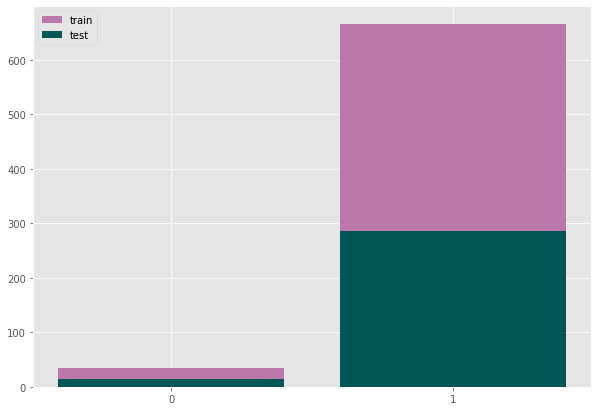

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(*np.unique(y_t1, return_counts=True), color="#BB77AA", label="train")
ax.bar(*np.unique(y_te1, return_counts=True), color="#005555", label="test")
ax.set_xticks([0, 1])
ax.legend()